In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
dat = pd.read_csv("train.csv")

In [48]:
print(dat.describe())
dat.isnull().sum()

Survived      Pclass       Title      Family     AgeBand   FareRange
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    2.645342    0.904602    1.324355    1.324355
std      0.486592    0.836071    1.161135    1.613459    0.820565    0.820565
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    1.500000    0.000000    1.000000    1.000000
50%      0.000000    3.000000    3.000000    0.000000    1.000000    1.000000
75%      1.000000    3.000000    3.000000    1.000000    2.000000    2.000000
max      1.000000    3.000000    5.000000   10.000000    4.000000    4.000000


Survived     0
Pclass       0
Sex          0
Embarked     0
Title        0
Family       0
AgeBand      0
FareRange    0
dtype: int64

In [49]:
dat.head()

,Survived,Pclass,Sex,Embarked,Title,Family,AgeBand,FareRange
0,0,3,male,S,3,1,1,1
1,1,1,female,C,4,1,2,2
2,1,3,female,S,1,0,1,1
3,1,1,female,S,4,1,2,2
4,0,3,male,S,3,0,2,2


In [20]:
# Creating a new column Title
dat["Title"] = dat.Name.str.extract("([A-Za-z]+)\.", expand = False)

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [32]:
dat['Age'] = dat[['Age','Pclass']].apply(impute_age,axis=1)

In [55]:
# Handling the outliers
dat.loc[dat["Age"] > 66, "Age"] = 66
dat.loc[dat["Fare"] > 70, "Fare"] = 70.0

In [43]:
# Adding an age band
dat["AgeBand"] = pd.cut(dat.Age, 5)
dat[["AgeBand", "Survived"]].groupby(["AgeBand"]).mean()
dat["AgeBand"] = dat["AgeBand"].astype("category").cat.codes

In [45]:
# Adding the fare range 
dat["FareRange"] = pd.cut(dat.Age, 5)
print(dat[["FareRange", "Survived"]].groupby(["FareRange"]).mean())
dat["FareRange"] = dat["FareRange"].astype("category").cat.codes

Survived
FareRange                 
(0.34, 16.336]    0.550000
(16.336, 32.252]  0.336714
(32.252, 48.168]  0.412844
(48.168, 64.084]  0.434783
(64.084, 80.0]    0.090909


In [22]:
dat.Title = dat.Title.replace(["Mlle, Ms"], "Miss")
dat.Title = dat.Title.replace("Mme", "Mrs")
dat.Title = dat.Title.replace("Ms", "Miss")

dat.Title = dat.Title.replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], "Rare")
pd.crosstab(dat.Title, dat.Sex)


Sex,female,male
Title,,
Master,0,40
Miss,183,0
Mlle,2,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [27]:
# Converting Title to ordinal values
dat.Title = dat.Title.astype("category")
dat.Title = dat.Title.cat.codes

In [23]:
# Creating a new Column Family
dat["Family"] = dat["Parch"] + dat["SibSp"]

In [33]:
# dat["Age"].isnull().sum()

0

In [47]:
# Removing the uneccessary columns
dat = dat.drop(columns = ["PassengerId", "Parch", "SibSp", "Cabin", "Ticket", "Name", "Fare", "Age"])

In [50]:
# Removing the nan valueed rows
# dat = dat.dropna()

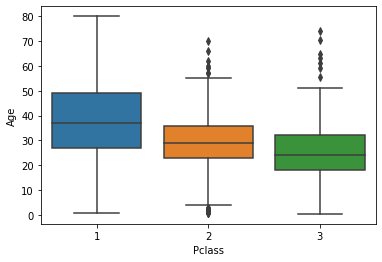

In [51]:
sns.boxplot(x = "Pclass", y = "Age", data = dat )

In [37]:
# Filling na in Embarked
dat.Embarked.fillna("S", inplace = True)

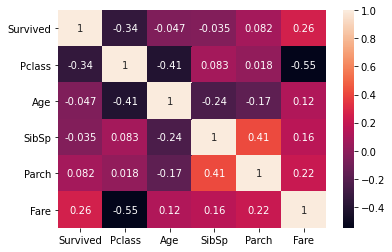

In [11]:
# Correlation matrix - heatmap
corr_matrix = dat.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

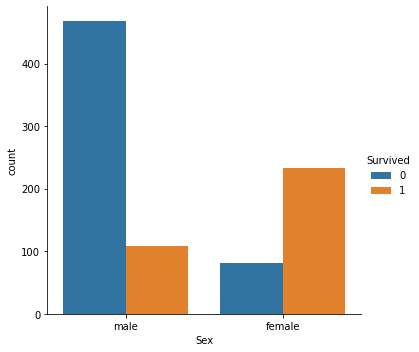

In [56]:
sns.catplot(x = "Sex", hue = "Survived", kind = "count", data = dat)

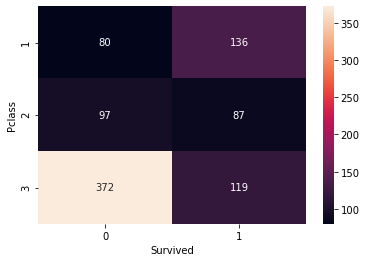

In [14]:
pclass_survived = dat.groupby(["Pclass", "Survived"]).size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt = "d")

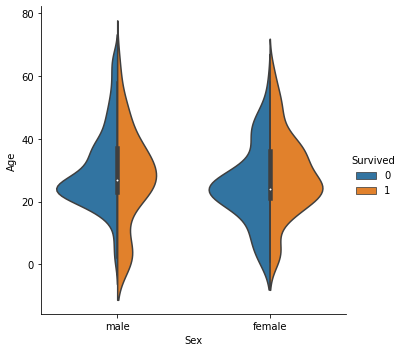

In [15]:
sns.catplot(x = "Sex", y = "Age", hue = "Survived", data = dat, kind = "violin", split = True)

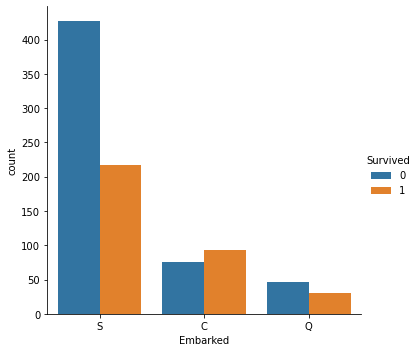

In [16]:
sns.catplot(x = "Embarked", hue = "Survived", kind = "count", data = dat)

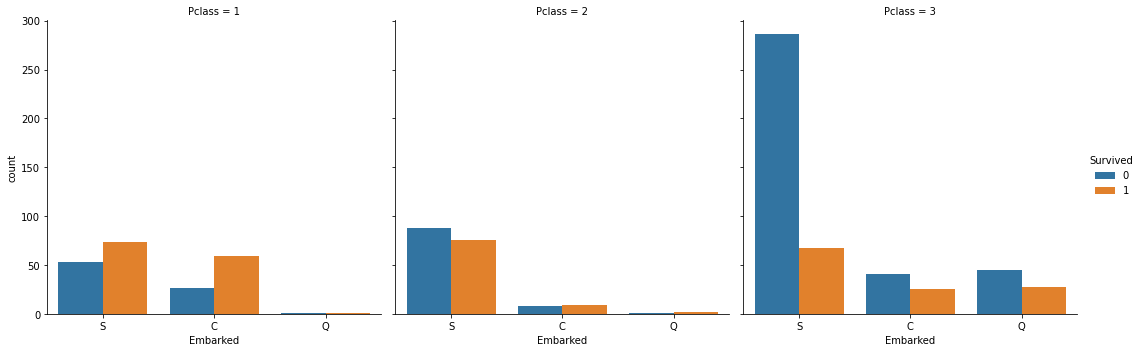

In [17]:
sns.catplot(x = "Embarked", hue = "Survived", kind = "count", data = dat, col = "Pclass")

In [50]:
dat = pd.get_dummies(dat, columns = ["Sex", "Embarked", "Pclass"])
dat.head()

,Survived,Title,Family,AgeBand,FareRange,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,3,1,1,1,0,1,0,0,1,0,0,1
1,1,4,1,2,2,1,0,1,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,1,0,0,1
3,1,4,1,2,2,1,0,0,0,1,1,0,0
4,0,3,0,2,2,0,1,0,0,1,0,0,1


In [58]:
# dat["Survived"] = dat["Survived"].astype("category", copy = False)
# dat["Age"] = dat["Age"].astype(int)
# dat["Fare"] = dat["Fare"].astype(int)
# dat.dtypes

In [51]:
y_train = dat["Survived"]
x_train = dat.drop(columns = ["Survived"])
x_train.shape

(891, 12)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20, random_state = 42)

In [53]:
x_train.describe()
x_train.dtypes
# x_train.head()

Title          int8
Family        int64
AgeBand        int8
FareRange      int8
Sex_female    uint8
Sex_male      uint8
Embarked_C    uint8
Embarked_Q    uint8
Embarked_S    uint8
Pclass_1      uint8
Pclass_2      uint8
Pclass_3      uint8
dtype: object

In [55]:
# Decision Tree
# dtree = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 9, random_state = 80)
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)
y_predict = dtree.predict(x_test)
accuracy_score(y_test, y_predict)

0.8156424581005587

In [56]:
# Random Forest
rfm = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs = -1, random_state = 101, max_features = None, min_samples_leaf = 30)

rfm.fit(x_train, y_train)
y_random = dtree.predict(x_test)
accuracy_score(y_test, y_random)

0.8156424581005587

In [32]:
svm = SVC(kernel="linear", C=0.025, random_state=80)

svm.fit(x_train, y_train)
y_svm = dtree.predict(x_test)
accuracy_score(y_test, y_svm)

0.8212290502793296

In [163]:
test = pd.read_csv("test.csv")

In [164]:
pass_id = test.PassengerId

In [165]:
test = test.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket"])

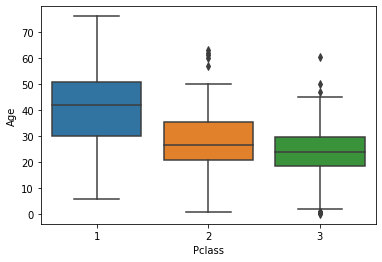

In [166]:
sns.boxplot(x = "Pclass", y = "Age", data = test )

In [183]:
# test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.321770,0.447368,0.392344,35.570664
std,0.841838,12.904065,0.896760,0.981429,55.852457
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,25.000000,0.000000,0.000000,14.454200
75%,3.000000,36.375000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [182]:
# Handling nan in fare
test["Fare"].fillna(12.0, inplace = True)

In [184]:
test = pd.get_dummies(test, columns = ["Sex", "Embarked", "Pclass"])
test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [185]:
y_ans = dtree.predict(test)

In [186]:
y_ans

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [188]:
# Saving the file
output = pd.DataFrame({"PassengerId": pass_id, "Survived": y_ans})

In [190]:
output.to_csv("output.csv", index = False)